# Implemention of Neural Network

# Imports

In [1]:
import numpy as np
import pandas as pd
from keras.optimizers import Adam, RMSprop
from keras.models import Model
from keras.layers import Dense, Activation, Dropout
from keras.layers import Input
from keras.layers import BatchNormalization
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


# Loading Data

In [2]:
X_train = pd.read_csv(filepath_or_buffer='x_train_pca.csv', header=None)

In [3]:
y_train = pd.read_csv(filepath_or_buffer='y_train.csv')

In [4]:
X_train.shape, y_train.shape

((8760227, 10), (8760227, 1))

In [5]:
X_train = X_train.loc[:,:].values

In [6]:
y_train = y_train.loc[:,:].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [8]:
# Calculate Root Mean Squared Logarithmic Error
def root_mean_squared_logarithmic_error(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log)))

rmsle = root_mean_squared_logarithmic_error
learning_rate = 0.001

Note:
If both predicted and actual values are small: RMSE and RMSLE is same.
If either predicted or the actual value is big: RMSE > RMSLE
If both predicted and actual values are big: RMSE > RMSLE (RMSLE becomes almost negligible)

# Model Compilation using SGD Optimizer and loss as RMSE

In [10]:
num_features = X_train.shape[-1]
_input = Input(shape=(num_features,))
layer1 = Dense(150, activation='linear')(_input)
layer1 = Dropout(0.2)(layer1)
layer2 = Dense(20, activation='relu')(layer1)
_output = Dense(1, activation='relu')(layer2)

model = Model(inputs=[_input], outputs=[_output])
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mean_squared_error')

# Building the model

In [11]:
checkpoint = ModelCheckpoint('weights1.h5', save_best_only=True,
                             monitor='val_loss', verbose=0)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
              patience=10, verbose=1)

def scheduler(epoch):
    if epoch < 40:
        return learning_rate
    if epoch > 40 and epoch < 80:
        return learning_rate * 0.1
    else:
        return learning_rate * 0.05
    
lr_scheduler = LearningRateScheduler(scheduler)

result_rmse = model.fit(X_train, y_train, batch_size=256, epochs=50, callbacks=[checkpoint],validation_split= 0.2)

Train on 5606544 samples, validate on 1401637 samples
Epoch 1/50
5606544/5606544 [==============================] - 38s 7us/step - loss: 0.2190 - val_loss: 0.2059
Epoch 2/50
5606544/5606544 [==============================] - 38s 7us/step - loss: 0.2074 - val_loss: 0.2058
Epoch 3/50
5606544/5606544 [==============================] - 36s 6us/step - loss: 0.2065 - val_loss: 0.2071
Epoch 4/50
5606544/5606544 [==============================] - 35s 6us/step - loss: 0.2062 - val_loss: 0.2040
Epoch 5/50
5606544/5606544 [==============================] - 35s 6us/step - loss: 0.2060 - val_loss: 0.2043
Epoch 6/50
5606544/5606544 [==============================] - 36s 6us/step - loss: 0.2059 - val_loss: 0.2040
Epoch 7/50
5606544/5606544 [==============================] - 35s 6us/step - loss: 0.2058 - val_loss: 0.2044
Epoch 8/50
5606544/5606544 [==============================] - 35s 6us/step - loss: 0.2052 - val_loss: 0.2037
Epoch 9/50
5606544/5606544 [==============================] - 36s 6us/step

# Model Compilation using SGD Optimizer and loss as RMSLE

In [19]:
num_features = X_train.shape[-1]
_input = Input(shape=(num_features,))
layer1 = Dense(150, activation='linear')(_input)
layer1 = Dropout(0.2)(layer1)
layer2 = Dense(20, activation='relu')(layer1)
_output = Dense(1, activation='relu')(layer2)

model = Model(inputs=[_input], outputs=[_output])
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss=rmsle)

# Building the Model

In [20]:
checkpoint = ModelCheckpoint('weights1.h5', save_best_only=True,
                             monitor='val_loss', verbose=0)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
              patience=10, verbose=1)

def scheduler(epoch):
    if epoch < 40:
        return learning_rate
    if epoch > 40 and epoch < 80:
        return learning_rate * 0.1
    else:
        return learning_rate * 0.05
    
lr_scheduler = LearningRateScheduler(scheduler)

results = model.fit(X_train, y_train, batch_size=256, epochs=50, callbacks=[checkpoint],validation_split= 0.2)

Train on 5606544 samples, validate on 1401637 samples
Epoch 1/50
5606544/5606544 [==============================] - 37s 7us/step - loss: 0.0706 - val_loss: 0.0658
Epoch 2/50
5606544/5606544 [==============================] - 37s 7us/step - loss: 0.0662 - val_loss: 0.0647
Epoch 3/50
5606544/5606544 [==============================] - 37s 7us/step - loss: 0.0654 - val_loss: 0.0643
Epoch 4/50
5606544/5606544 [==============================] - 37s 7us/step - loss: 0.0651 - val_loss: 0.0641
Epoch 5/50
5606544/5606544 [==============================] - 38s 7us/step - loss: 0.0649 - val_loss: 0.0641
Epoch 6/50
5606544/5606544 [==============================] - 37s 7us/step - loss: 0.0647 - val_loss: 0.0639
Epoch 7/50
5606544/5606544 [==============================] - 37s 7us/step - loss: 0.0646 - val_loss: 0.0638
Epoch 8/50
5606544/5606544 [==============================] - 37s 7us/step - loss: 0.0644 - val_loss: 0.0639
Epoch 9/50
5606544/5606544 [==============================] - 37s 7us/step

# Result

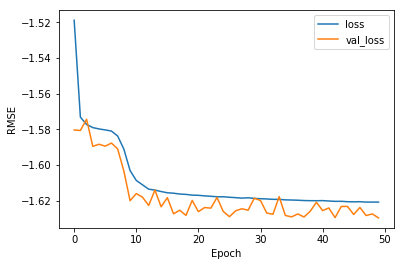

In [21]:
# Plot between Epoch and RMSE
plt.plot(result_rmse.epoch, np.log(result_rmse.history['loss']), label='loss')
plt.plot(result_rmse.epoch, np.log(result_rmse.history['val_loss']), label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.savefig('epoch_rmse.png')
plt.show()

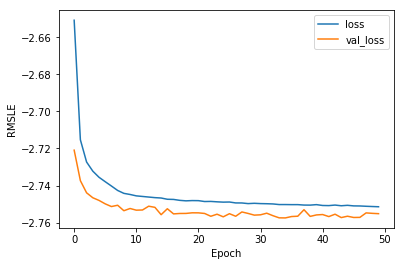

In [22]:
# Plot between Epoch and RMSLE
plt.plot(results.epoch, np.log(results.history['loss']), label='loss')
plt.plot(results.epoch, np.log(results.history['val_loss']), label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('RMSLE')
plt.legend()
plt.savefig('epoch_rmsle.png')
plt.show()

In [23]:
y_test_post = model.predict(X_test)

In [24]:
format(mean_squared_error(y_test, y_test_post))

'0.19901330094693628'

In [50]:
loss_test = []
for y1, y2 in zip(y_test, y_test_post):
    diff = np.log(y1 + 1.) - np.log(y2 + 1.)
    loss_test.append(diff ** 2)

In [51]:
np.sqrt(np.mean(loss_test))

0.06317297910624926

In [52]:
pred = model.predict(X_train)
pred.shape

(7008181, 1)

C:\Users\ausaf\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


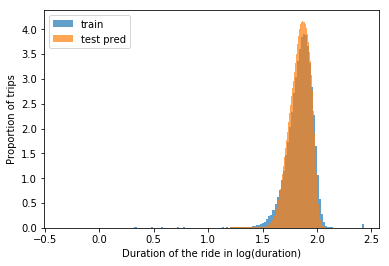

In [53]:
# Using log to plot distribution of training and predicted duration
plt.hist(np.log(y_train), bins=150, alpha=0.7, label='train', normed=True)
plt.hist(np.log(pred), bins=150, alpha=0.7, label='test pred', normed=True)
plt.xlabel('Duration of the ride in log(duration)')
plt.ylabel('Proportion of trips')
plt.legend(loc='upper left')
plt.savefig('log_train.png')
plt.show()